In [1]:
%run IDM_helper_functions.ipynb

In [2]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [3]:
import pandas as pd
import os

In [5]:
data_dir = '/Users/wangjiashun/Desktop/SAT/validation_text_data/exp_3/pp'        
#df = pd.read_csv(path, sep = " ")
#df

In [148]:
sample_size = 20

In [178]:
par_fitted_A = np.zeros((20,3))
for i in range(20):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    df = df[df["cond"]=="A"] # A condition
    
    data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
    samp = Sample.from_numpy_array(data_sub, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.01, maxval=4)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    #par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


0


Info: Params [2.66983629 0.64448812 0.34204375] gave -228.92867072557794


[2.66983629 0.64448812 0.34204375]
1


Info: Params [2.73391169 0.56027806 0.34171961] gave -179.67023152132657


[2.73391169 0.56027806 0.34171961]
2


Info: Params [3.69102192 0.78216289 0.25502754] gave -337.1563095055172


[3.69102192 0.78216289 0.25502754]
3


Info: Params [1.00825998 0.5122745  0.26413239] gave -4.405454589932937


[1.00825998 0.5122745  0.26413239]
4


Info: Params [2.48794381 0.5819769  0.2273459 ] gave -227.82750522712274


[2.48794381 0.5819769  0.2273459 ]
5


Info: Params [1.53239524 0.57059294 0.2512579 ] gave -45.75835087258259


[1.53239524 0.57059294 0.2512579 ]
6


Info: Params [1.87014103 0.60385434 0.24458972] gave -94.36558072070113


[1.87014103 0.60385434 0.24458972]
7


Info: Params [1.79016865 0.71704194 0.20226445] gave -6.717523697141097


[1.79016865 0.71704194 0.20226445]
8


Info: Params [1.95140836 0.63301417 0.2248318 ] gave -96.53380497614955


[1.95140836 0.63301417 0.2248318 ]
9


Info: Params [0.66869228 0.4245329  0.20996045] gave -83.38201055892549


[0.66869228 0.4245329  0.20996045]
10


Info: Params [1.46820281 0.58551509 0.22417837] gave -24.3226257633063


[1.46820281 0.58551509 0.22417837]
11


Info: Params [0.82757889 0.55738524 0.22746958] gave 51.64494379319468


[0.82757889 0.55738524 0.22746958]
12


Info: Params [1.38225217 0.60287803 0.21206692] gave 19.249126258271154


[1.38225217 0.60287803 0.21206692]
13


Info: Params [2.05185207 0.6476485  0.32537562] gave -111.50570194201805


[2.05185207 0.6476485  0.32537562]
14


Info: Params [1.90528146 0.80031229 0.18895179] gave -4.9500795760705145


[1.90528146 0.80031229 0.18895179]
15


Info: Params [2.48803688 0.67513024 0.28968167] gave -176.4517472867119


[2.48803688 0.67513024 0.28968167]
16


Info: Params [3.19034559 0.54416656 0.29441039] gave -358.7695916934201


[3.19034559 0.54416656 0.29441039]
17


Info: Params [1.04155271 0.5056563  0.37608384] gave 61.68210287452626


[1.04155271 0.5056563  0.37608384]
18


Info: Params [2.94536064 0.6845653  0.24319402] gave -257.2351661710896


[2.94536064 0.6845653  0.24319402]
19


Info: Params [2.02204994 0.70292444 0.24195611] gave -70.6625843834068


[2.02204994 0.70292444 0.24195611]


In [179]:
par_fitted_B = np.zeros((20,3))
for i in range(20):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    df = df[df["cond"]=="B"] # A condition
    
    data_sub = np.stack((np.array((df["rt"])), np.array((df["correct"]))), axis = 1)
    samp = Sample.from_numpy_array(data_sub, column_names = [])
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.01, maxval=4)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    #par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    


0


Info: Params [1.54344938 0.71848487 0.34921705] gave 75.21257570491683


1


Info: Params [1.15442497 0.72727006 0.39917919] gave 174.965862524689


2


Info: Params [1.40042463 0.7255567  0.29428598] gave 119.66717780621417


3


Info: Params [0.61692799 0.64667393 0.32119694] gave 228.60722982182352


4


Info: Params [2.37488454 0.88343177 0.30290911] gave -68.78078566182322


5


Info: Params [0.97149671 0.62430905 0.33921567] gave 121.05748621942314


6


Info: Params [1.51214785 0.67948994 0.25967608] gave 39.883270591023226


7


Info: Params [1.40398873 1.0786928  0.26951022] gave 248.42490340938122


8


Info: Params [1.29506368 0.82683068 0.31682009] gave 200.53797227545704


9


Info: Params [1.12213867 0.96987032 0.21180897] gave 318.6439161433858


10


Info: Params [1.06363486 0.63057402 0.25165019] gave 118.16946635381751


11


Info: Params [1.14058216 0.93784368 0.47396659] gave 305.49702204739117


12


Info: Params [1.22828033 0.67504256 0.32442335] gave 124.01496664970753


13


Info: Params [1.36878643 0.75756997 0.53431546] gave 150.4012506068819


14


Info: Params [1.57115544 0.70656797 0.29191228] gave 34.04535105017663


15


Info: Params [1.93070784 0.64041108 0.37518691] gave -68.9907361234358


16


Info: Params [1.74235883 0.64701745 0.34764838] gave -8.00192158112393


17


Info: Params [0.54318156 0.8654059  0.42092309] gave 431.3757430647947


18


Info: Params [1.6013386  0.73487925 0.37015298] gave 51.4102740307577


19


Info: Params [1.21203057 0.82725021 0.32709214] gave 237.64895401406687


In [180]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time'])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size
df_SAT.to_csv('DDMresultDutilh2019.csv')

In [ ]:
df_SAT = pd.read_csv(('DDMresultDutilh2019.csv'))

In [182]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [183]:
#dif_Z = (dif )/np.std(dif, axis = 0)
#df_dif_Z = pd.DataFrame(dif_Z,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [184]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Difference")
#df_dif_Z_melted = pd.melt(df_dif_Z, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'])

In [193]:
df_dif_melted.to_csv("DDMdifResultDutilh2019.csv") 


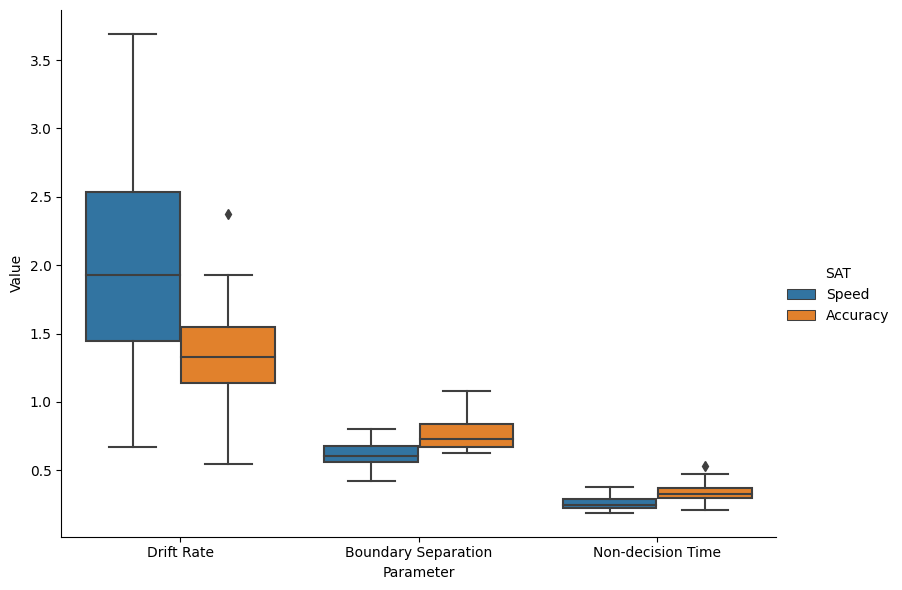

In [188]:
import seaborn as sns
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=8/6)


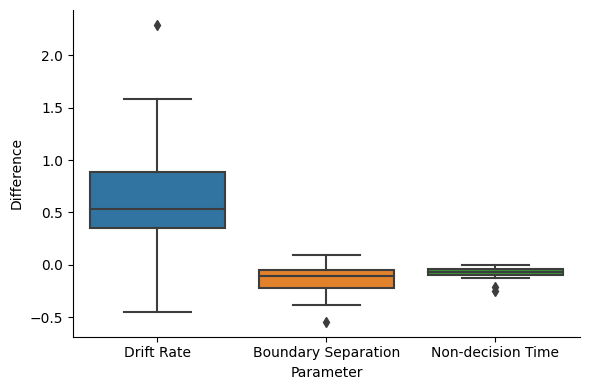

In [187]:
import seaborn as sns
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=4, aspect=6/4)

In [63]:
import scipy
scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0])

Ttest_relResult(statistic=3.3391300472252516, pvalue=0.0034473934284977455)

In [64]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=-4.074332616856631, pvalue=0.0006465530455187766)

In [65]:
scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2])

Ttest_relResult(statistic=-5.755670820956369, pvalue=1.513868423962202e-05)

In [191]:
df_SAT_melted

,SAT,Parameter,Value
0,Speed,Drift Rate,2.669836
1,Speed,Drift Rate,2.733912
2,Speed,Drift Rate,3.691022
3,Speed,Drift Rate,1.008260
4,Speed,Drift Rate,2.487944
...,...,...,...
115,Accuracy,Non-decision Time,0.375187
116,Accuracy,Non-decision Time,0.347648
117,Accuracy,Non-decision Time,0.420923
118,Accuracy,Non-decision Time,0.370153
